## Problem

Food Delivery services like Glovo and Jumia Foods need to show the accurate time it will take to deliver order to keep transparency with their customers. These companies use Machine Learning algorithms to predict the food delivery time based on how much time the delivery partners took for the same distance in the past. This project seeks to build a machine learning model that predicts the time it will take, given a particular location, to deliver food

###### Data Source
kaggle.com

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import Dataset
data = pd.read_csv('/content/drive/MyDrive/Data Science/Food Delivery/deliverytime - Copy.csv')

In [4]:
data

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30
...,...,...,...,...,...,...,...,...,...,...,...
45588,7C09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,Meal,motorcycle,32
45589,D641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,Buffet,motorcycle,36
45590,4F8D,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,Drinks,scooter,16
45591,5EEE,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,Snack,motorcycle,26


In [5]:
# Check for missing data
data.isna().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
dtype: int64

#### Exploratory Data Analysis

In [6]:
data.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken(min)
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,29.544075,4.632367,17.017729,70.231332,17.465186,70.845702,26.294607
std,5.696793,0.327708,8.185109,22.883647,7.335122,21.118812,9.383806
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,10.000000
25%,25.000000,4.600000,12.933284,73.170000,12.988453,73.280000,19.000000
50%,29.000000,4.700000,18.546947,75.898497,18.633934,76.002574,26.000000
75%,34.000000,4.800000,22.728163,78.044095,22.785049,78.107044,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,54.000000


In [7]:
# Data for 15 year old riders
data[data.Delivery_person_Age==15]

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
2387,564,JAPRES15DEL03,15,1.0,-26.891191,75.802083,26.981191,75.892083,Meal,motorcycle,15
2905,CD0,INDORES010DEL03,15,1.0,22.750040,75.902847,22.810040,75.962847,Snack,scooter,29
2951,91A,SURRES17DEL03,15,1.0,21.149569,72.772697,21.209569,72.832697,Buffet,bicycle,20
5902,474,CHENRES15DEL03,15,1.0,13.026286,80.275235,13.056286,80.305235,Drinks,bicycle,25
9156,73F,BANGRES05DEL01,15,1.0,12.970324,77.645748,13.080324,77.755748,Buffet,motorcycle,34
10900,1B49,MUMRES14DEL02,15,1.0,19.181300,72.836191,19.231300,72.886191,Buffet,motorcycle,39
11125,40B,SURRES12DEL01,15,1.0,-21.183434,-72.814492,21.193434,72.824492,Meal,scooter,27
12093,523,INDORES03DEL02,15,1.0,22.751857,75.866699,22.801857,75.916699,Buffet,bicycle,28
15124,18B0,RANCHIRES02DEL01,15,1.0,0.000000,0.000000,0.070000,0.070000,Meal,bicycle,21
15927,550,CHENRES08DEL02,15,1.0,13.022394,80.242439,13.072394,80.292439,Snack,bicycle,17


<Axes: xlabel='Delivery_person_Age'>

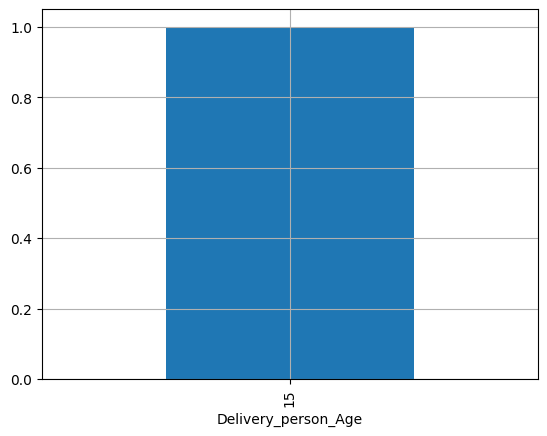

In [8]:
data[data.Delivery_person_Age==15].groupby(['Delivery_person_Age'])['Delivery_person_Ratings'].mean().plot(kind='bar', grid=True)

From the data above, it is easy to see that all of the 15 year olds have a 1.0 rating, which is relatively low. I would now test the relationship between the delivery person's age and the target variable

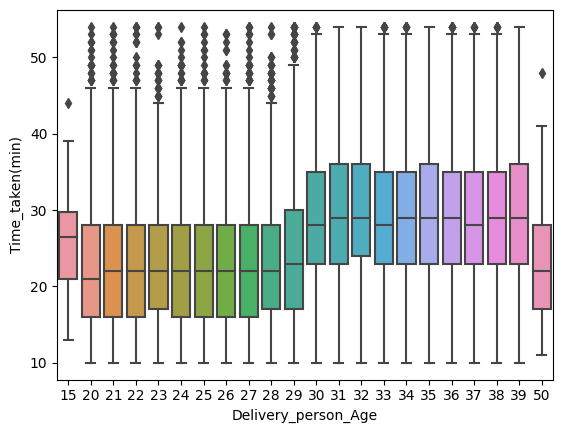

In [9]:
x = data.Delivery_person_Age
yt = data['Time_taken(min)']
sns.boxplot(x=x, y=yt);

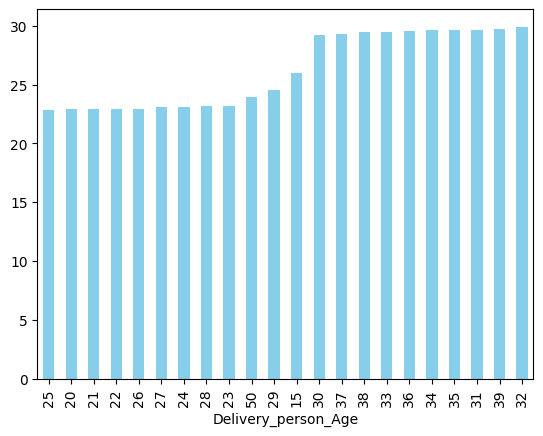

In [10]:
data.groupby(['Delivery_person_Age'])['Time_taken(min)'].mean().sort_values().plot(kind='bar', color=['skyblue']);

The relationship between delivery person's age and the time taken to deliver is nonlinear

### Relationship between the type of Vehicle and the time taken

It would be nice to test the relationship between the type of vehicle used to deliver and the time taken to deliver the order

<Axes: xlabel='Type_of_vehicle'>

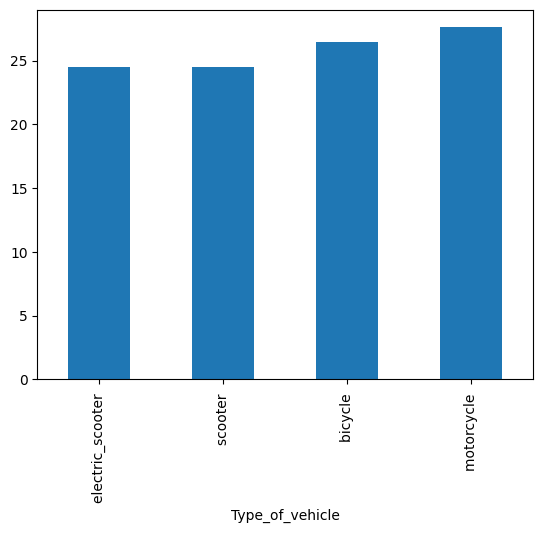

In [11]:
data.groupby(['Type_of_vehicle'])['Time_taken(min)'].mean().sort_values().plot(kind='bar')

The type of vehicles and the order in which  they deliver fastest, from fastest to slowest:
1. Electric scooter
2. Scooter
3. Bicycle
4. Motorcycle

##### Type of Order and Minutes Taken

This is to evaluate the relationship between the type of order and the minutes taken

<Axes: xlabel='Type_of_order'>

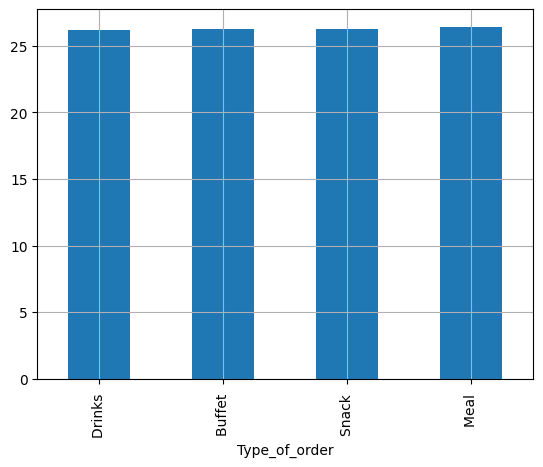

In [12]:
data.groupby(['Type_of_order'])['Time_taken(min)'].mean().sort_values().plot(kind='bar', grid=True)

According to the above, the type of order does not have an effect on the delivery time

#### Data Processing & Feature Engineering

I would now begin to prepare the data for the machine learning model

In [13]:
# Dropping the 'Type_of_order' column
data.drop('Type_of_order', axis=1, inplace=True)

In [14]:
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,scooter,30


###### Calculate the distance between restaurants and delivery location

I would be using the 'Haversine Formula' to derive the distances between the longitudes and latitudes

Latitudes and Logitudes are measured in degrees, and so, I shall convert the degrees to radians

In [15]:
# Function to convert degree to radian
def deg_to_radian(degree):
    return degree * np.pi/180

In [16]:
# Function for Haversine Formula
import math

def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great-circle distance between two points 
    on the Earth's surface, given their latitude and longitude 
    coordinates, using the Haversine formula.
    
    Parameters
    ----------
    lat1 : float
        Latitude of the first point, in degrees
    lon1 : float
        Longitude of the first point, in degrees
    lat2 : float
        Latitude of the second point, in degrees
    lon2 : float
        Longitude of the second point, in degrees
        
    Returns
    -------
    float
        The distance between the two points, in kilometers
    """
    # Convert degrees to radians
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])
    
    # Haversine formula
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a)) 
    r = 6371 # Radius of earth in kilometers.
    return c * r


In [17]:
# Create a distance column
data['distance(km)'] = np.nan

In [18]:
data

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_vehicle,Time_taken(min),distance(km)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,motorcycle,24,NaN
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,scooter,33,NaN
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,motorcycle,26,NaN
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,motorcycle,21,NaN
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,scooter,30,NaN
...,...,...,...,...,...,...,...,...,...,...,...
45588,7C09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,motorcycle,32,NaN
45589,D641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,motorcycle,36,NaN
45590,4F8D,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,scooter,16,NaN
45591,5EEE,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,motorcycle,26,NaN


In [19]:
for i in range(len(data)):
    data.loc[i, 'distance(km)'] = haversine(data.loc[i, 'Restaurant_latitude'], 
                                        data.loc[i, 'Restaurant_longitude'], 
                                        data.loc[i, 'Delivery_location_latitude'], 
                                        data.loc[i, 'Delivery_location_longitude'])

In [20]:
data

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_vehicle,Time_taken(min),distance(km)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,motorcycle,24,3.025149
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,scooter,33,20.183530
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,motorcycle,26,1.552758
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,motorcycle,21,7.790401
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,scooter,30,6.210138
...,...,...,...,...,...,...,...,...,...,...,...
45588,7C09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,motorcycle,32,1.489846
45589,D641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,motorcycle,36,11.007735
45590,4F8D,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,scooter,16,4.657195
45591,5EEE,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,motorcycle,26,6.232393


### Some more Exploratory Data Analysis

Let us test the relationship between distance and time taken

In [21]:
x = data['Time_taken(min)']
yt = data['distance(km)']

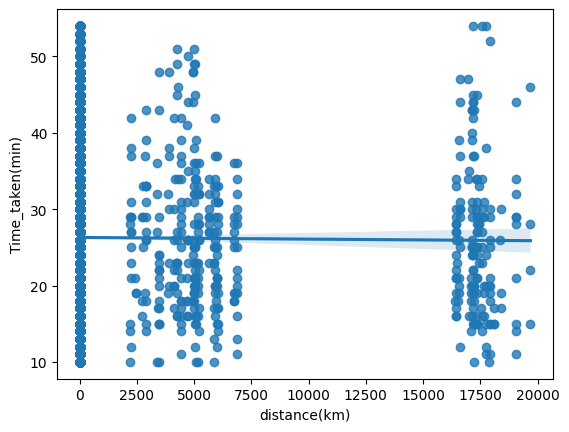

In [22]:
sns.regplot(x = yt, y=x);

The relationship between distance and time taken is nonlinear, as the relationship  is consistent, ie the time of delivery is consistent regardless of the distance

#### The relationship between ratings and time taken to deliver

In [23]:
yt = data['Delivery_person_Ratings']

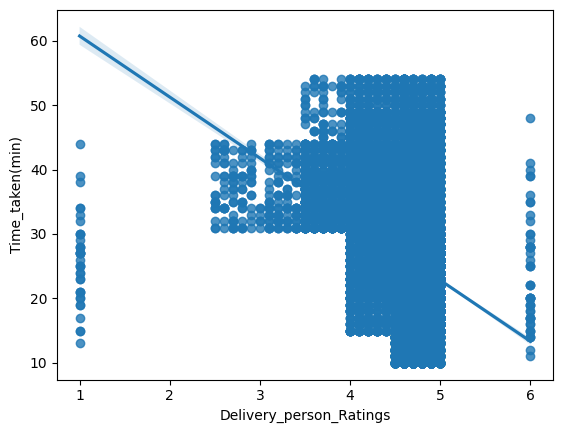

In [24]:
sns.regplot(x=yt, y=x);

This shows that ratings dependent on the delivery time taken. The lesser the time taken, the higher the ratings

##### Relationship between ratings and age

In [25]:
x = data.Delivery_person_Age

<Axes: xlabel='Delivery_person_Age', ylabel='Delivery_person_Ratings'>

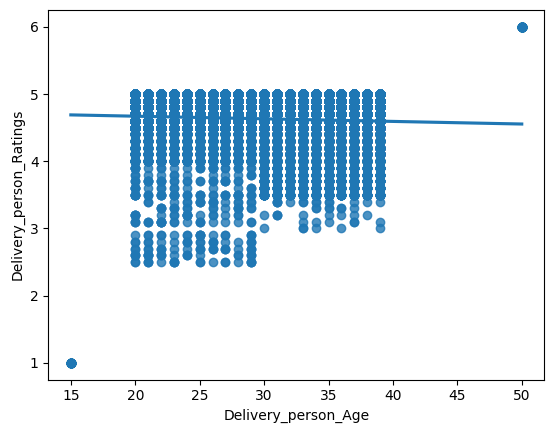

In [26]:
sns.regplot(x=x, y=yt)

This tells us that the most of the ratings 2.5 - 5.0 come from delivery people aged 20-40, and that there is a slightly negatively linear relationship between delivery person's age and their ratings

##### Relationship Between Age and Time Taken

In [27]:
yt = data['Time_taken(min)']

<Axes: xlabel='Delivery_person_Age', ylabel='Time_taken(min)'>

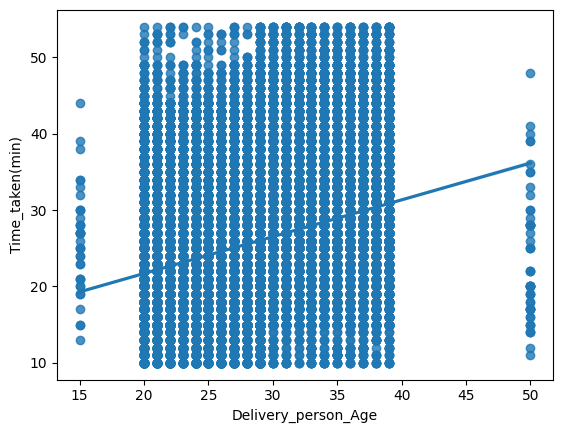

In [28]:
sns.regplot(x=x, y=yt)

There's a linear relationship between a person's age and the time taken. i.e. the older they are, the more time they tend to take

In [52]:
# Split Datasets into X and y
X = np.array(data[['Delivery_person_Age', 'Delivery_person_Ratings', 'distance(km)']])
y = np.array(data['Time_taken(min)'])

In [53]:
Xtrain, Xtest, ytrain, ytest = X[:40000], X[40000:45593], y[:40000], y[40000:45593],

In [54]:
Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape

((40000, 3), (40000,), (5593, 3), (5593,))

In [55]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [56]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(Xtrain.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 3, 128)            66560     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_4 (Dense)             (None, 25)                1625      
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(Xtrain, ytrain, batch_size=1, epochs=9)

Epoch 1/9
40000/40000 [==============================] - 232s 6ms/step - loss: 68.8318
Epoch 2/9
40000/40000 [==============================] - 262s 7ms/step - loss: 64.0239
Epoch 3/9
40000/40000 [==============================] - 232s 6ms/step - loss: 61.1650
Epoch 4/9
40000/40000 [==============================] - 233s 6ms/step - loss: 60.0952
Epoch 5/9
40000/40000 [==============================] - 233s 6ms/step - loss: 60.1120
Epoch 6/9
40000/40000 [==============================] - 234s 6ms/step - loss: 59.2642
Epoch 7/9
40000/40000 [==============================] - 228s 6ms/step - loss: 59.0641
Epoch 8/9
40000/40000 [==============================] - 229s 6ms/step - loss: 58.8162
Epoch 9/9
40000/40000 [==============================] - 236s 6ms/step - loss: 58.5608


In [58]:
print('Food Delivery Time Prediction')
a = int(input('Age of delivery person'))
b = float(input('Ratings? '))
c = float(input("distance in KM"))
features = np.array([[a, b, c]])
print("Predicted Delivery Time in Minutes = ", model.predict(features))

Food Delivery Time Prediction
Age of delivery person34
Ratings? 3
distance in KM20
1/1 [==============================] - 1s 823ms/step
Predicted Delivery Time in Minutes =  [[34.52942]]
